# Titanice Dataset Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('titanic_train.csv')

# Summarization

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Observation : 
    1. Name column can be dropped. Not required.
    2. Sex column needs to be changed to int - Label Encoder.
    3. Ticket column can be dropped.
    4. Cabin column has too many null values. Can be dropped.
    5. There are some missing values in Age column : Imputation is needed.

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


There may be some outliers present in columns - Fare and Age since there is big gap between 75% and max

# Data Manipulation

In [6]:
#Encoding : 

gender = df['Sex']
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(gender)
df['Sex'] = encoder.fit_transform(gender)

embarked = df['Embarked']
encoder.fit(embarked.astype(str))
df['Embarked'] = encoder.fit_transform(embarked.astype(str))


In [7]:
#Dropping unwanted columns : 
df.drop('Name',axis=1,inplace=True)
df.drop('Ticket',axis=1,inplace=True)
df.drop('Cabin',axis=1,inplace=True)
df.drop('PassengerId',axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [8]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


# Data Visualization

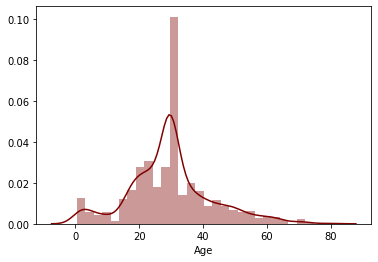

In [10]:
sns.distplot(df['Age'],color='Maroon')

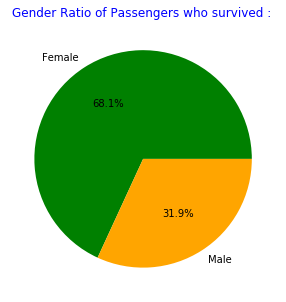

In [11]:
data = df[df['Survived'] == 1]
gender = data['Sex'].value_counts()
colors_list = ['Green','Orange']
plt.figure(figsize=(5,5))
plt.pie(gender,labels=['Female','Male'],colors=colors_list,autopct='%1.1f%%')
plt.title("Gender Ratio of Passengers who survived : ",color='Blue')
plt.show()

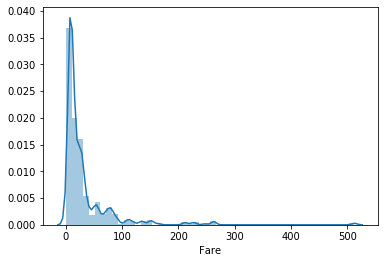

In [12]:
sns.distplot(df['Fare'])

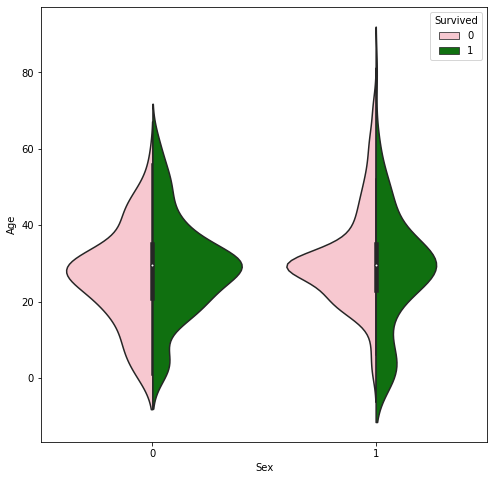

In [13]:
#Correlation of Survival with Age :

fig = plt.figure(figsize=(8,8))
sns.violinplot(x='Sex',y='Age',
               hue='Survived',data=df,
               split=True,palette={0:'pink',1:'green'}
              )
    
    

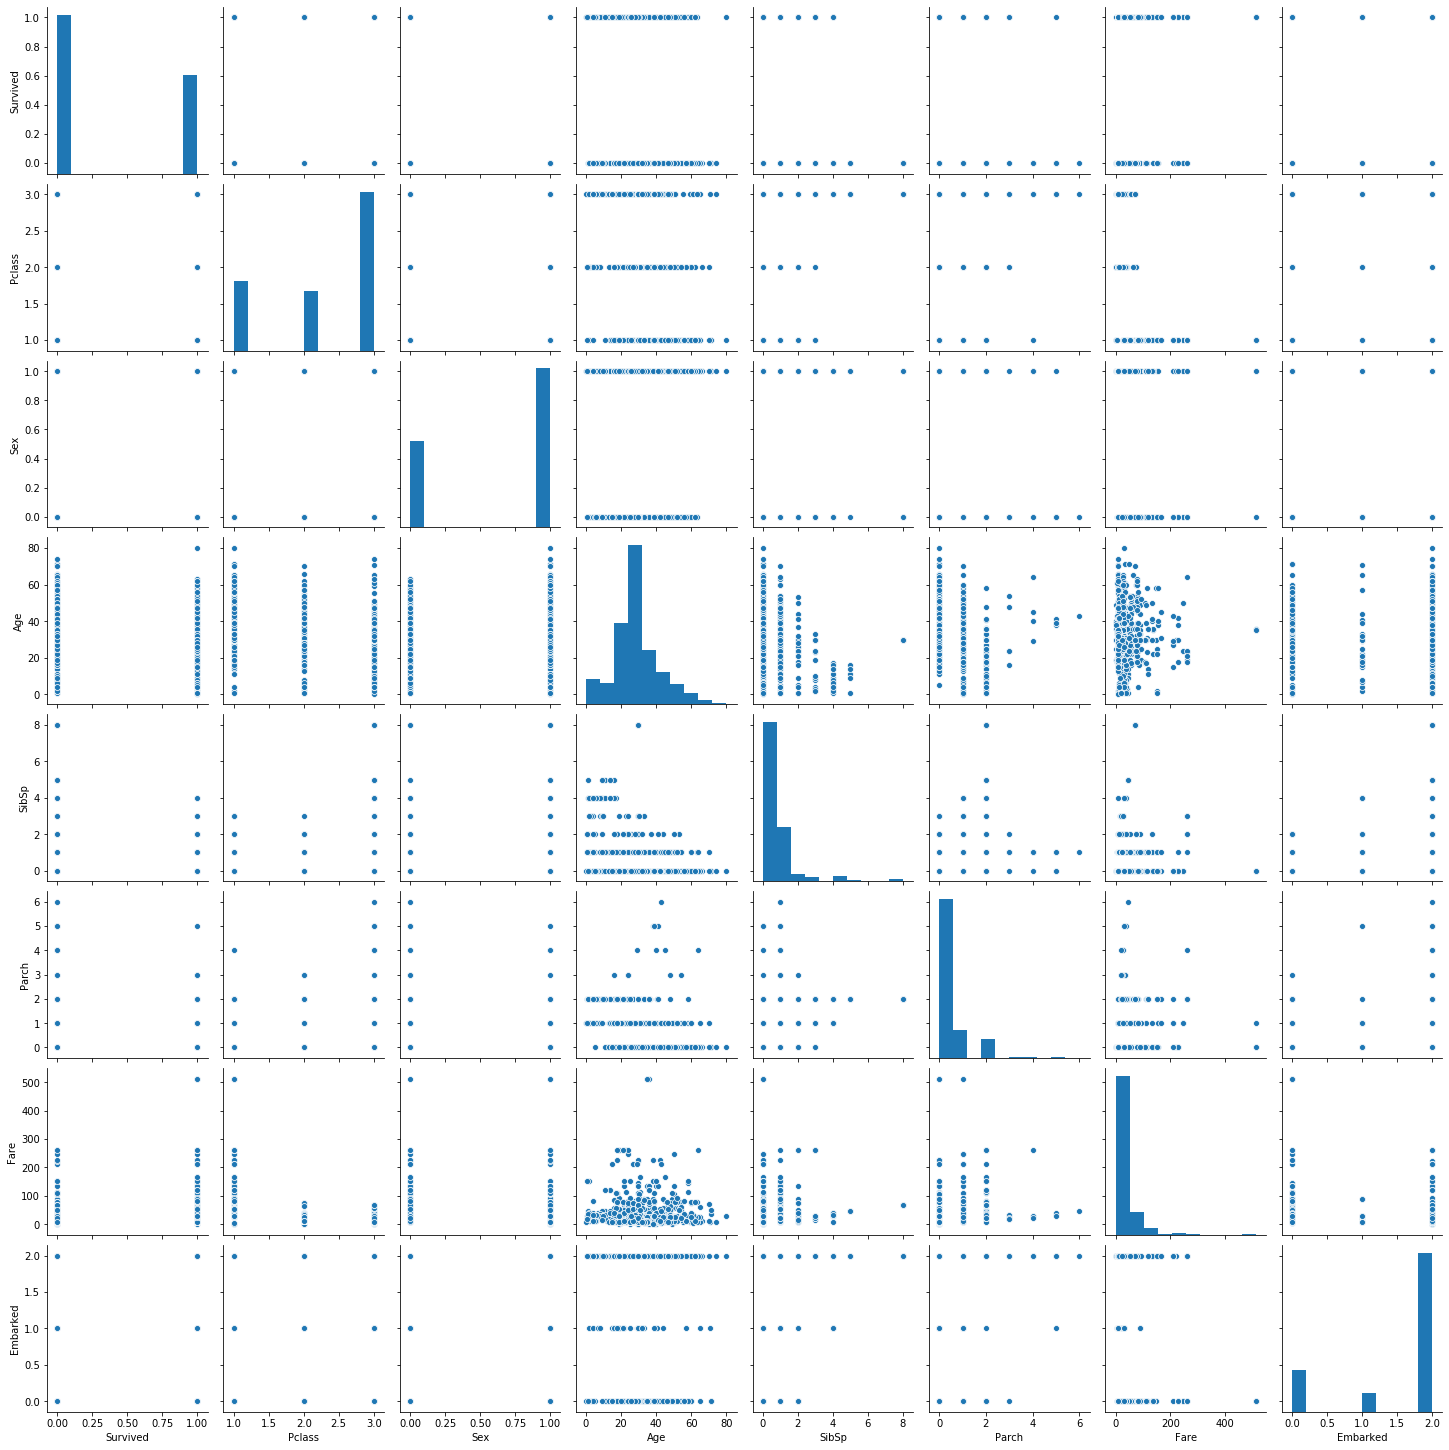

In [14]:
sns.pairplot(df)

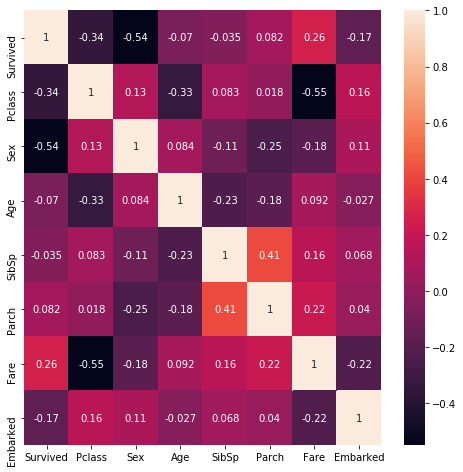

In [15]:
df_corr = df.corr()
plt.figure(figsize = (8,8))
sns.heatmap(df_corr,annot=True)

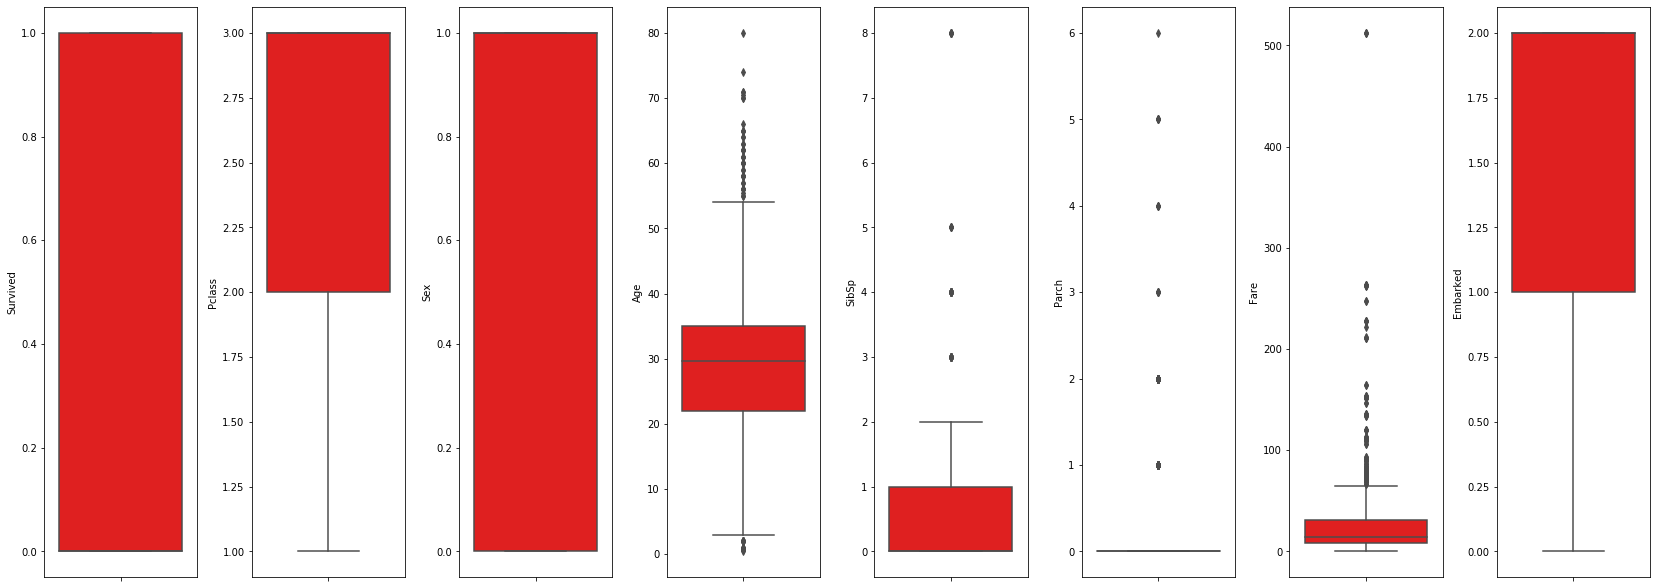

In [16]:
col = df.columns.values
#Check for outliers :
plt.figure(figsize=(26,130))
for i in range(0,len(col)):
    plt.subplot(16,9,i+1)
    sns.boxplot(df[col[i]],color='red',orient='v')
    plt.tight_layout()
plt.show()

In [17]:
#Use z-score to remove outliers :
from scipy.stats import zscore
z=np.abs(zscore(df))
#print(np.where(z>3))
df_new = df[(z<3).all(axis=1)]

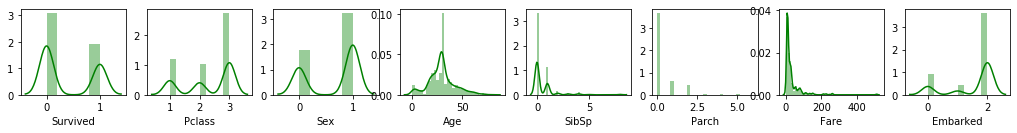

In [18]:
#Check for right and left skewness:
col = df.columns.values
plt.figure(figsize=(20,30))
for i in range(0,len(col)):
    plt.subplot(16,9,i+1)
    sns.distplot(df[col[i]],color='green')
plt.show()


In [19]:
df_new.shape

(820, 8)

In [20]:
df.shape

(891, 8)

In [21]:
df_new.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

In [22]:
df_new['SibSp'] = np.sqrt(df_new['SibSp'])
df_new['Parch'] = np.sqrt(df_new['Parch'])
df_new['Fare'] = np.sqrt(df_new['Fare'])

In [23]:
df_new['SibSp'] = np.sqrt(df_new['SibSp'])
df_new['Parch'] = np.sqrt(df_new['Parch'])
df_new['Fare'] = np.sqrt(df_new['Fare'])

In [24]:
df_new['Parch'] = np.sqrt(df_new['Parch'])
df_new.drop('Parch',axis=1,inplace=True)
df_new.drop('SibSp',axis=1,inplace=True)

In [25]:
df_new.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.318314
Fare       -0.004748
Embarked   -1.277386
dtype: float64

In [26]:
df_new.shape
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 820 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  820 non-null    int64  
 1   Pclass    820 non-null    int64  
 2   Sex       820 non-null    int32  
 3   Age       820 non-null    float64
 4   Fare      820 non-null    float64
 5   Embarked  820 non-null    int32  
dtypes: float64(2), int32(2), int64(2)
memory usage: 38.4 KB


# Model Selection

In [27]:
X=df_new.iloc[:,1:]
y=df_new.iloc[:,0]
X.shape


(820, 5)

# Model Prediction and Evaluation

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split


max_r2_score=0
for i in range(0,201):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    score = r2_score(y_test,y_pred)
    #print(i," : ", score)
    if score>max_r2_score:
        max_r2_score = score
        final_state = i
print("Best score for random state ",final_state," is : ",max_r2_score)
    

Best score for random state  14  is :  0.4321842541020624


In [29]:
#Logistic Regression without regularization :
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=14)

logistic1 = LogisticRegression()
logistic1.fit(x_train,y_train)
y_predlogistic = logistic1.predict(x_test)
score=accuracy_score(y_test,y_predlogistic)
print("Score : ",score)

Score :  0.8597560975609756


In [30]:
# L2 is supported by : newton-cg,sag,saga,liblinear lbfg solver

logistic3 = LogisticRegression(penalty='l2',solver='liblinear')

logistic3.fit(x_train,y_train)
y_predlogistic = logistic3.predict(x_test)

print("Score    :",accuracy_score(y_test,y_pred))

Score    : 0.45121951219512196


In [31]:
# Elasticnet is supported by saga solver
# L1 is supported by Liblinear solver
# Penalty = L1, L2, Elasticnet : Regularizstion parameters.

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=14)

logistic2 = LogisticRegression(penalty='l1',solver='liblinear' )
logistic2.fit(x_train,y_train)
y_pred = logistic2.predict(x_test)
score=accuracy_score(y_test,y_pred)

print("Score : ",score)



Score :  0.8719512195121951


In [32]:

print("Confusion Matrix :")
print()
print(confusion_matrix(y_test,y_pred))

Confusion Matrix :

[[85  6]
 [15 58]]


In [33]:
print("Classification Report : ")
print()
print(classification_report(y_test,y_pred))

Classification Report : 

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        91
           1       0.91      0.79      0.85        73

    accuracy                           0.87       164
   macro avg       0.88      0.86      0.87       164
weighted avg       0.88      0.87      0.87       164



Cross Validation : 

In [34]:
from sklearn.model_selection import cross_val_score

logistic = LogisticRegression()
scores = cross_val_score(logistic,X,y,cv=5,)
print(" Score : ",scores)
print(" Mean : ",scores.mean())
print(" Standard Deviation : ",scores.std())

 Score :  [0.79878049 0.79268293 0.76829268 0.79878049 0.80487805]
 Mean :  0.7926829268292683
 Standard Deviation :  0.01279035180695308


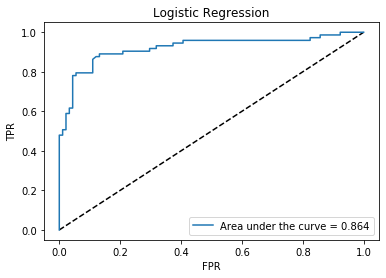

In [35]:
#AuC-ROC Curve :
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

y_pred_prob = logistic2.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
auc_score = roc_auc_score(y_test,logistic2.predict(x_test))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,Label='Area under the curve = %0.3f'%auc_score)
plt.legend(loc = "lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Logistic Regression")
plt.show()

In [36]:
#Comparison : 
np.array(y_pred)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [37]:
np.array(y_test)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int64)

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print("Mean Absolute Error : ", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error : ", mean_squared_error(y_test,y_pred))

Mean Absolute Error :  0.12804878048780488
Mean Squared Error :  0.12804878048780488
